<a href="https://colab.research.google.com/github/Abinash2249/Broadway_Infosys_Data_Science_Project/blob/main/4_Water_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/water_potability.csv")

# Data Profiling and Inspection

In [ ]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


* The dataset contains all numerical values, all the columns except for the column Potanility contain continuous data whereas Potability column contains discrete data.

In [ ]:
df.shape

(3276, 10)

* There are 3276 rows and 10 columns in this dataset.

In [ ]:
df.isna()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

* There are some missing values in the dataset. The column ph, Sulfate and Trihalmomethanes have missing values 491, 781 and 162 respectively.

# Descriptive statistics

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


* Hardness, and Solids show a wide range of values, indicating significant variability in water quality.
* Potability: Only about 39% of the samples are potable.
* Parameters like Solids and Conductivity have high maximum values, suggesting some water samples have very high mineral content.

# EDA (Exploratory Data Analysis)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.71608,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0


In [ ]:
cor = df.corr()
cor

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<Axes: >

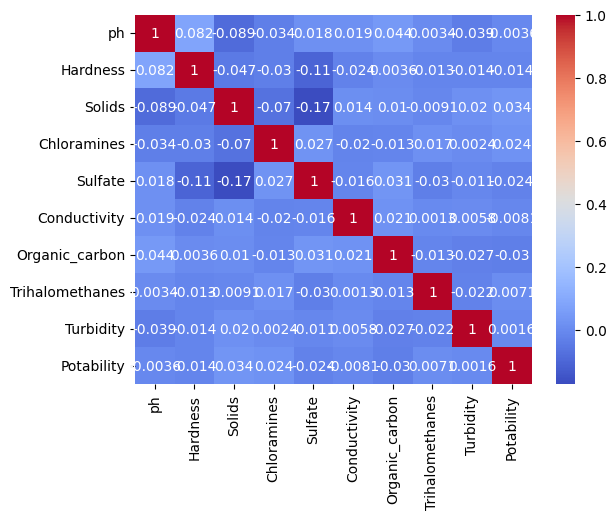

In [ ]:
sns.heatmap(cor, annot=True, cmap="coolwarm")

* The correlation between the variables in dataset is quite low which indicates they are not a good indicator of water potability when put against it individually.
* Negative correlation is also seen between some variables.

# Handling missing values

In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

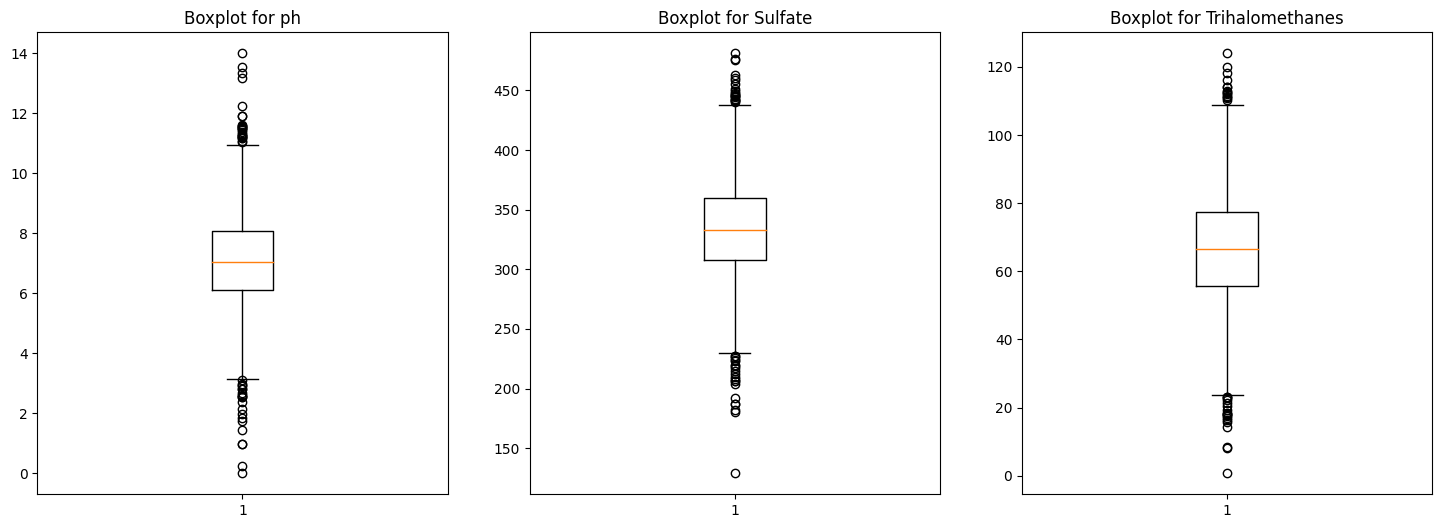

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for outliers
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))
axes[0].boxplot(df["ph"].dropna())
axes[0].set_title("Boxplot for ph")

axes[1].boxplot(df["Sulfate"].dropna())
axes[1].set_title("Boxplot for Sulfate")

axes[2].boxplot(df["Trihalomethanes"].dropna())
axes[2].set_title("Boxplot for Trihalomethanes")

plt.show()

* Here we notice outliers in the data of the columns "ph", "Sulfate", and "Trihalomethanes". As mean is not effective when extreme values are present in the dataset, we will use median to fill in the missing values.

In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Data visualization

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: >

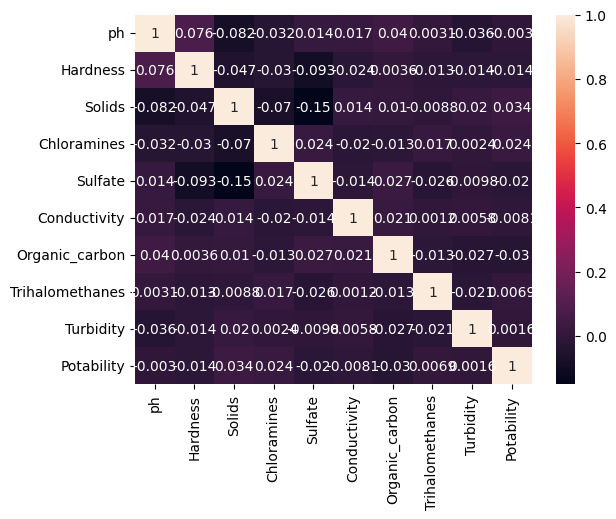

In [ ]:
sns.heatmap(df.corr(), annot = True)

# Train Test Split

* We wil train the model using certain portion of the data of the dataset and then will use the created model to predict the remaining data in dataset to check the accuracy of the model.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier

* With random forest classifier, we will determine the features to predict the water quality.

* We also use classification report and other metrics to see how good our model performs.


* accuracy - It is the percentage of correctly predicted instances out of the total instances. It gives us a general idea regarding how often our model was correct.

* precision -
  * Precision is the percentage of correct positive predictions out of all positive predictions made by the model.
  * It tells us how many positive predictions were correct.
  * High precision means fewer false positives.


* recall -
  * Recall is the percentage of actual positives that were correctly identified by the model.
  * It tells us how many of the actual positives were captured by the model.
  * High precision means fewer false positives.

* f1-score -
  * It is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.
  * It helps in giving a balanced measure when you need to consider both precision and recall.

* Support -
  * It is the number of actual occurrences of each class in the dataset.
  * It gives context to other metrics.

* roc-auc
 * The ROC curve will plot the recall (sensitivity) on the y-axis against the false positive rate on the x-axis.
 * AUC provides a single value summary of the ROC curve.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier result")
print(f'Accuracy: {accuracy}')

print("Classification Report")
print(classification_report(y_test, y_pred))

print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Random Forest Classifier result
Accuracy: 0.6737804878048781
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       412
           1       0.60      0.38      0.46       244

    accuracy                           0.67       656
   macro avg       0.65      0.61      0.61       656
weighted avg       0.66      0.67      0.65       656

Confusion matrix
[[350  62]
 [152  92]]


* Accuracy - The model correctly classifies approximately 67% of the test samples. While this indicates the model is better than random guessing (which would be around 50% for a binary classification problem), it also shows there is significant room for improvement.

* Classification Report
  * Precision for Class 0 (Non-Potable): 0.70
    * Of all the samples predicted as Non-Potable, 70% were correctly identified. This indicates that there are some false positives.
  
  * Precision for Class 1 (Potable): 0.60
    * Of all the samples predicted as Potable, 60% were correctly identified. This suggests a higher rate of false positives for potable water.

  * Recall for Class 0 (Non-Potable): 0.85
    * The model is good at identifying actual Non-Potable samples, with an 85% recall rate, indicating few false negatives for Non-Potable water.

  * Recall for Class 1 (Potable): 0.38
    * The model struggles to identify actual Potable samples, with only a 38% recall rate. This indicates many false negatives for Potable water.

  * F1-Score for Class 0: 0.77
    * This balance between precision and recall indicates the model performs relatively well for Non-Potable water.
  
  * F1-Score for Class 1: 0.46
    * The model's performance for Potable water is less satisfactory, suggesting a need for improvement.

* Confusion matrix

  * True Negatives (TN): 350
    * The model correctly identified 350 Non-Potable water samples.
  * False Positives (FP): 62
    * The model incorrectly identified 62 Non-Potable water samples as Potable.
  * False Negatives (FN): 152
    * The model incorrectly identified 152 Potable water samples as Non-Potable.
  * True Positives (TP): 92
    * The model correctly identified 92 Potable water samples.

# Gradient Boosting Classifier to predict quality of water

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)

gb_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Result")
print(f'Accuracy: {accuracy_gb}')

print("Classification Report")
print(classification_report(y_test, y_pred_gb))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Classifier Result
Accuracy: 0.6692073170731707
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.90      0.77       412
           1       0.62      0.28      0.39       244

    accuracy                           0.67       656
   macro avg       0.65      0.59      0.58       656
weighted avg       0.66      0.67      0.63       656

Confusion Matrix
[[371  41]
 [176  68]]


* Accuracy - The accuracy of the model is approximately 0.669 or 66.9%. This indicates that about 66.9% of the predictions made by the model are correct.

* Classification Report

  * Precision -
    *  For class 0 (non-potable water), the precision is 0.68, and for class 1 (potable water), the precision is 0.62.
  * Recall -
    * For class 0, the recall is 0.90, and for class 1, the recall is 0.28.
  * F1-score -
    * For class 0, the F1-score is 0.77, and for class 1, the F1-score is 0.39.

* Confusion matrix

  * t shows that out of 412 samples of class 0, 371 were correctly classified as class 0 (true negatives), and 41 were incorrectly classified as class 1 (false positives). Out of 244 samples of class 1, 68 were correctly classified as class 1 (true positives), and 176 were incorrectly classified as class 0 (false negatives).

# Decision regarding model selection

* Although both models have similar overall accuracy, the Random Forest Classifier tends to have a better balance between precision and recall for both classes. Additionally, its precision for class 0 (non-potable water) is slightly higher, so for this reason, it can chosen.